In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%config InlineBackend.figure_format = 'retina' #Эта строчка улучшает качевство на маках с ретиной. 
                                                #Если у вас не ретина, удалите

In [2]:
x = [0,1,2,3,4,5,6,7,8,9,10]
y = [2,5,10,17,26,37,50,65,82,101,122]

In [3]:
df = pd.DataFrame({'x' : x, 'y' : y})
df

,x,y
0,0,2
1,1,5
2,2,10
3,3,17
4,4,26
5,5,37
6,6,50
7,7,65
8,8,82
9,9,101


## Давайте отобразим наши данные на графике, чтобы понять, с чем имеем дело

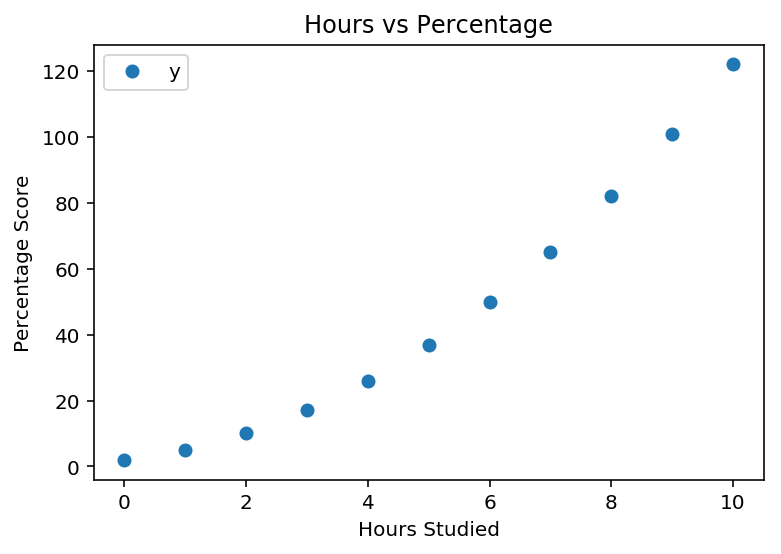

In [4]:
df.plot(x='x', y='y', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

## "Обзовем" данные, согласно традициям ML, так же разобьем их на тестовые и тренировочные

In [5]:
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

## Давайте посмотрим на то, как выглядят разбитые данные

## Так выглядит тренировочная выборка

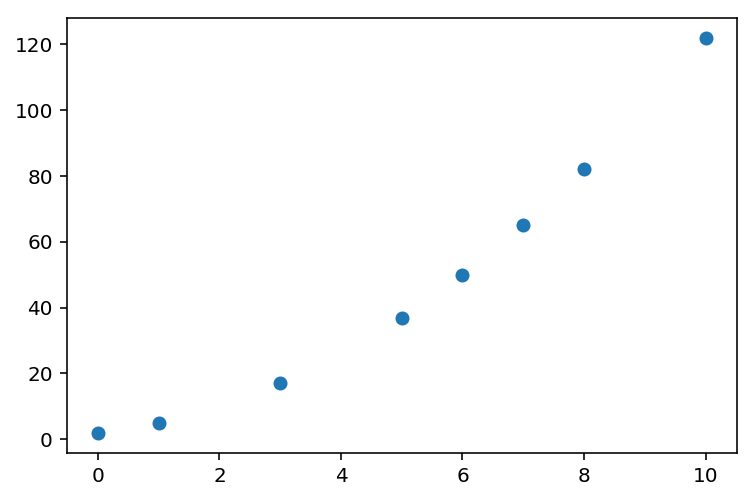

In [6]:
plt.scatter(X_train, y_train)
plt.show()

## А так - тестовая

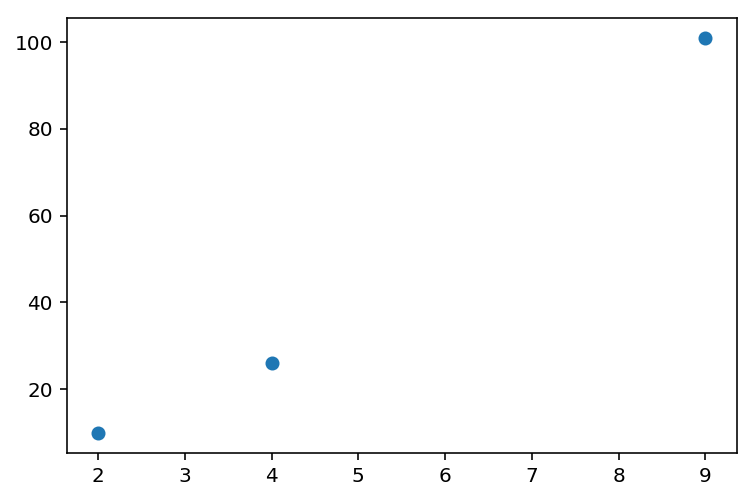

In [7]:
plt.scatter(X_test, y_test)
plt.show()

## Первой попробуем линейную регрессию

In [8]:
from sklearn.linear_model import LinearRegression# импортируем линейную регрессию

linReg = LinearRegression() # в переменную записываем нашу регерссию 
linReg.fit(X_train, y_train) # обучаем
linReg_y_pred = linReg.predict(X_test) #записываем предсказания

linReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 'Predicted': np.reshape(linReg_y_pred,len(linReg_y_pred))})
linReg_df_pred

,Actual,Predicted
0,26,35.928571
1,101,93.785714
2,10,12.785714


In [9]:
linReg_MAE = metrics.mean_absolute_error(y_test, linReg_y_pred)
linReg_MSE = metrics.mean_squared_error(y_test, linReg_y_pred)
linReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, linReg_y_pred))
print('Mean Absolute Error:', linReg_MAE)  
print('Mean Squared Error:', linReg_MSE)  
print('Root Mean Squared Error:',linReg_RMSE ) 

Mean Absolute Error: 6.6428571428571415
Mean Squared Error: 52.79421768707481
Root Mean Squared Error: 7.265962956626934


## Попробуем другой алгоритм регрессии - KNeighborsRegressor(Регрессия К ближайших соседей)

In [10]:
from sklearn.neighbors import KNeighborsRegressor 

KNReg = KNeighborsRegressor()
KNReg.fit(X_train, y_train) 

KNReg_y_pred = KNReg.predict(X_test)

KNReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 'Predicted': np.reshape(KNReg_y_pred,len(KNReg_y_pred))})
KNReg_df_pred

,Actual,Predicted
0,26,34.8
1,101,71.2
2,10,22.2


In [11]:
KNReg_MAE = metrics.mean_absolute_error(y_test, KNReg_y_pred)
KNReg_MSE = metrics.mean_squared_error(y_test, KNReg_y_pred)
KNReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, KNReg_y_pred))
print('Mean Absolute Error:', KNReg_MAE)  
print('Mean Squared Error:', KNReg_MSE)  
print('Root Mean Squared Error:', KNReg_RMSE) 

Mean Absolute Error: 16.933333333333334
Mean Squared Error: 371.4399999999999
Root Mean Squared Error: 19.27277873063456


## При стандартном значении кол-ва соседей резултат совсем не радостный. Попробуем n_neighbors=2

In [12]:
from sklearn.neighbors import KNeighborsRegressor 

KNReg = KNeighborsRegressor(n_neighbors=2)
KNReg.fit(X_train, y_train) 

KNReg_y_pred = KNReg.predict(X_test)

KNReg_df_pred = pd.DataFrame({'Actual': np.reshape(y_test,len(y_test)), 'Predicted': np.reshape(KNReg_y_pred,len(KNReg_y_pred))})
KNReg_df_pred

,Actual,Predicted
0,26,27.0
1,101,102.0
2,10,11.0


In [13]:
KNReg_MAE = metrics.mean_absolute_error(y_test, KNReg_y_pred)
KNReg_MSE = metrics.mean_squared_error(y_test, KNReg_y_pred)
KNReg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, KNReg_y_pred))
print('Mean Absolute Error:', KNReg_MAE)  
print('Mean Squared Error:', KNReg_MSE)  
print('Root Mean Squared Error:', KNReg_RMSE) 

Mean Absolute Error: 1.0
Mean Squared Error: 1.0
Root Mean Squared Error: 1.0


## результат уже очень хорош

Смысла пробовать *Ridge* или *Lasso* нет, так как данные описаны параболой и мы уже убедились в неэффективности линейных регрессий. Эти же будут даже менее эффективны, так как гребневая прибегнет у уменьшению коэф-ов, а лассо и вовсе не будет иметь смысла, так как признак только один и избавляться не от чего

*Деревья*, *случайный лес* или *бустинг деревьев* так же не дадут результата, так как данные описываются не условиями, а зависимостью

Вывод: лучшая модель из тех, которые я знаю для регрессии данных с лийнейной зависимостью это KNeighbors

# Более наглядно.
## кстати, есть метод .score
## давайте посмотрим правильность разных моделей в процентах

In [14]:
print("Правильность KNreg на обучающем наборе: {:.3f}".format(KNReg.score(X_train, y_train))) 
print("Правильность KNreg на тестовом наборе: {:.3f}".format(KNReg.score(X_test, y_test))) 

Правильность KNreg на обучающем наборе: 0.944
Правильность KNreg на тестовом наборе: 0.999


In [15]:
print("Правильность linReg на обучающем наборе: {:.3f}".format(linReg.score(X_train, y_train))) 
print("Правильность linReg на тестовом наборе: {:.3f}".format(linReg.score(X_test, y_test))) 

Правильность linReg на обучающем наборе: 0.940
Правильность linReg на тестовом наборе: 0.966


In [45]:
def f(x):
    return x**2+1
y_test2 = []
x_test2 = list(range(50))
for i in range(50):
    y_test2.append(f(i))
x_test2 = np.array(x_test2).reshape(-1, 1)
y_test2 = np.array(y_test2).reshape(-1, 1)


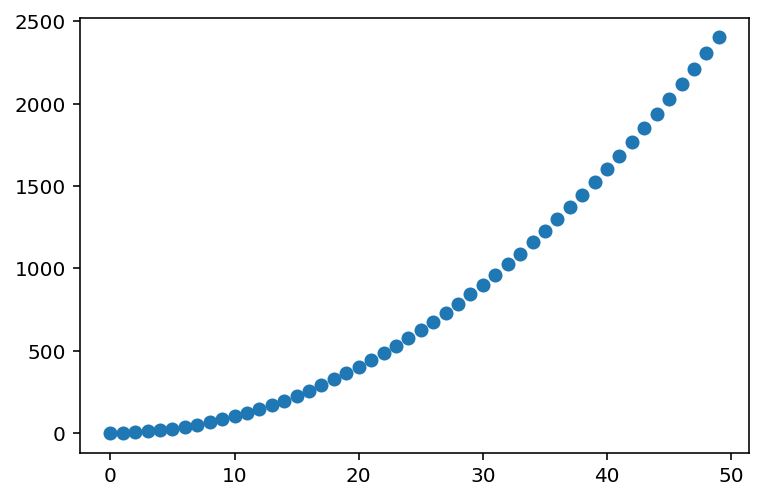

50

In [46]:
plt.scatter(x_test2, y_test2)
plt.show()
len(y_test2)

In [47]:
print("Правильность KNreg на доп. наборе: {:.3f}".format(KNReg.score(x_test2, y_test2))) 
print("Правильность linReg на доп. наборе: {:.3f}".format(linReg.score(x_test2, y_test2))) 

Правильность KNreg на доп. наборе: -0.934
Правильность linReg на доп. наборе: -0.149
